In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
extra = data[data.duplicated()]
extra.shape

(240, 12)

In [5]:
y = data.quality                  # set 'quality' as target
X = data.drop('quality', axis=1)  # rest are features
print(y.shape, X.shape)

(1599,) (1599, 11)


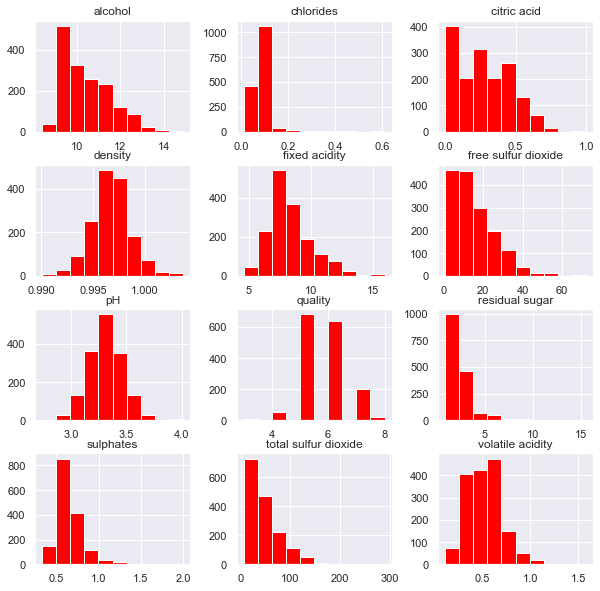

In [6]:
sns.set()
data.hist(figsize=(10,10), color='red')
plt.show()

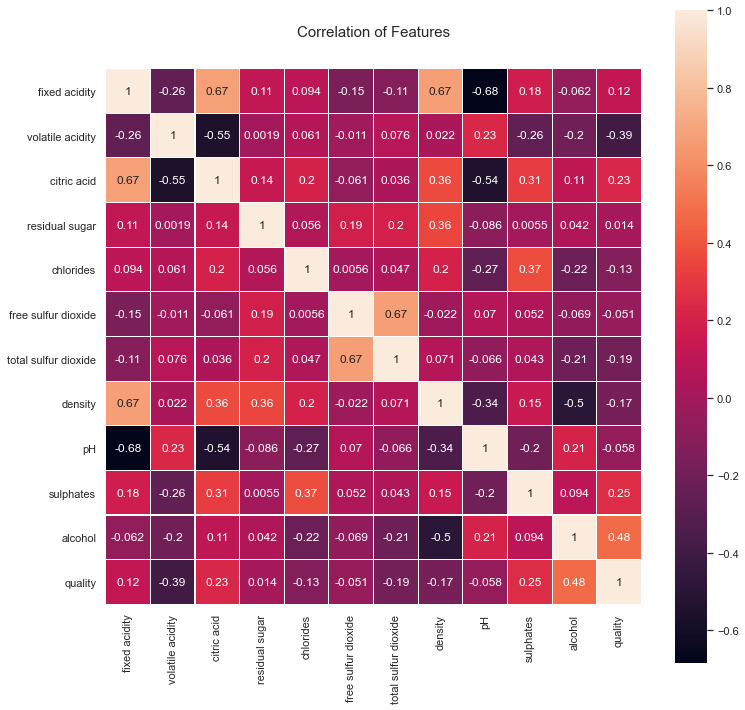

In [7]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

In [8]:
y1 = (y > 5).astype(int)
y1.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

In [10]:
seed = 8 # set seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2,
                                                    random_state=seed)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [12]:
from sklearn.preprocessing import LabelEncoder

bins = (2, 5, 8)
group_names = ['bad', 'good']

data['quality'] = pd.cut(data["quality"], bins = bins, labels = group_names)

label_quality = LabelEncoder()

data['quality'] = label_quality.fit_transform(data['quality'].astype(str))
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

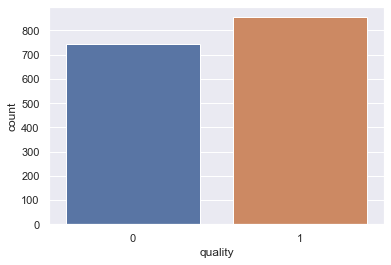

In [13]:
sns.countplot(data['quality'])
plt.show()

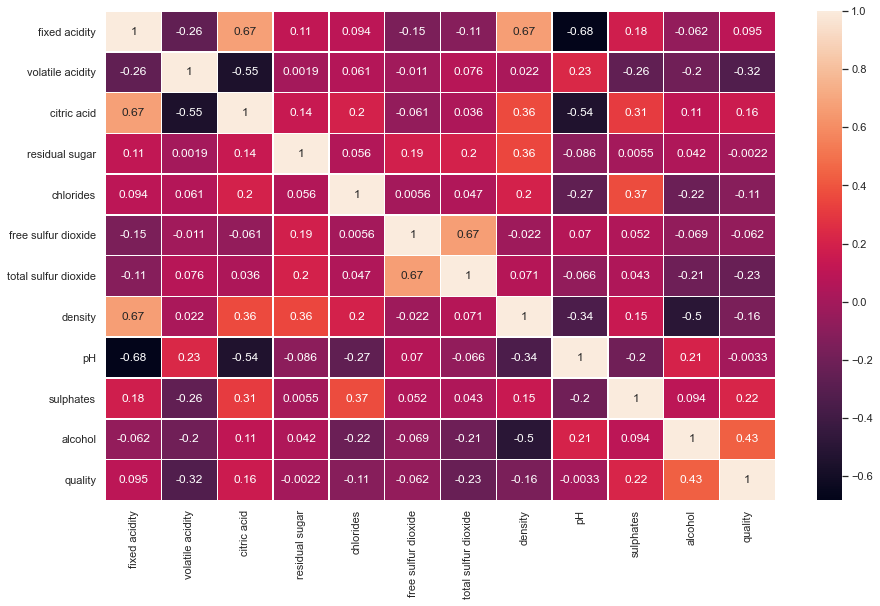

In [14]:
plt.subplots(figsize=(15, 9))
cor = data.corr()
sns.heatmap(cor, annot=True, linewidths=.5)
plt.show()

In [15]:
cor_feat = abs(cor["quality"])

#relevant features
rel_feat = cor_feat[cor_feat>0.2]
rel_feat

volatile acidity        0.321441
total sulfur dioxide    0.231963
sulphates               0.218072
alcohol                 0.434751
quality                 1.000000
Name: quality, dtype: float64

In [16]:
data[["volatile acidity","citric acid"]].corr()

,volatile acidity,citric acid
volatile acidity,1.000000,-0.552496
citric acid,-0.552496,1.000000


In [17]:
data[["volatile acidity","sulphates"]].corr()

,volatile acidity,sulphates
volatile acidity,1.000000,-0.260987
sulphates,-0.260987,1.000000


In [18]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=10)

In [20]:
import statsmodels.api as sm
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

selected_features_BE = cols
selected_features_BE

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'sulphates',
 'alcohol']

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()

rfe = RFE(model, 8)
X_rfe = rfe.fit_transform(X_train, y_train)

model.fit(X_rfe, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True False False  True  True  True  True]
[1 1 1 4 1 2 3 1 1 1 1]


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [22]:
nof_list=np.arange(1,11)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=4 as keyword args. Fr

Optimum number of features: 10
Score with 10 features: 0.274943


In [23]:
cols = list(X_train.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 7)             

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  

#Fitting the data to model
model.fit(X_rfe,y_train)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
